# Project 2 : Cosmetic Product Development

### Ingredient Recommender System for Cosmetic Product Development

Import all the packages

In [251]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import category_encoders as ce
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [190]:
df = pd.read_csv('/Users/tj/Downloads/amazon_facial_product.csv')

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/1733070675.py:1: DtypeWarning: Columns (30,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,95,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/tj/Downloads/amazon_facial_product.csv')


In [191]:
df

,answeredQuestions,asin,bestsellerRanks,bestsellerRanks/0/category,bestsellerRanks/0/rank,bestsellerRanks/0/url,bestsellerRanks/1/category,bestsellerRanks/1/rank,bestsellerRanks/1/url,bestsellerRanks/2/category,...,variantAsins/26,variantAsins/27,variantAsins/28,variantAsins/29,variantAttributes/0/key,variantAttributes/0/value,variantAttributes/1/key,variantAttributes/1/value,variantAttributes/2/key,variantAttributes/2/value
0,601.0,B014PGEEO2,NaN,Beauty & Personal Care,308.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,8.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83.0,B01N4VMLGA,NaN,Beauty & Personal Care,26283.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,511.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,Pattern Name,Hyaluronic Acid Serum,NaN,NaN,NaN,NaN
2,5.0,B07TLZ65PZ,NaN,Beauty & Personal Care,21593.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,415.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,Color,Hyaluronic & Retinol,NaN,NaN,NaN,NaN
3,670.0,B01BT02Q88,NaN,Beauty & Personal Care,358.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,10.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,Scent,Regular,Size,1 Fl Oz (Pack of 1),NaN,NaN
4,NaN,B09KMZG5GG,NaN,Beauty & Personal Care,81407.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,1489.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,NaN,B09GZT28TP,NaN,Beauty & Personal Care,333573.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,5856.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9978,NaN,B0B76V92HH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9979,NaN,B0BPP948DN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Color,2PC,NaN,NaN,NaN,NaN
9980,NaN,B09XFL7MW1,NaN,Beauty & Personal Care,715590.0,https://www.amazon.com/gp/bestsellers/beauty/r...,Facial Serums,11062.0,https://www.amazon.com/gp/bestsellers/beauty/7...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rename the column

In [192]:
df = df[['title','brand','reviewsCount','stars','price/value','breadCrumbs','description','seller/name']]

In [193]:
df = df.rename(columns = {'breadCrumbs':'category','price/value': 'price', 'stars': 'rating', 'seller/name': 'seller', 'reviewsCount':'review' })

### Data Cleansing

In [194]:
df.isnull().sum()

title             0
brand           865
review         3807
rating         3807
price          3658
category          2
description    3862
seller          410
dtype: int64

### Modify the category column to make it more understandable

In [195]:
df['category'] = df['category'].fillna('')
df['category'] = df['category'].apply(lambda x: x.split('›')[2].strip() if len(x.split('›')) >= 3 else x.split('›')[0].strip())

In [197]:
df

,title,brand,review,rating,price,category,description,seller
0,"Tree of Life Vitamin C Serum, Retinol Serum an...",Tree of Life Beauty,65249.0,4.4,23.95,Face,NaN,DoubleY Brands
1,OZNATURALS Hyaluronic Acid Serum for Face - Pl...,OZNaturals,2437.0,4.4,18.00,Face,NaN,OZ Naturals
2,AZURE Hyaluronic Acid & Retinol Anti Aging Fac...,Azure Cosmetics,592.0,4.4,7.69,Face,NaN,Official FORTIFY & AZURE Skincare
3,Eva Naturals Vitamin C Serum for Face Plus Hya...,Eva Naturals,52231.0,4.3,14.99,Face,NaN,Eva Naturals Inc.
4,Wishful Hydrate & Glow Trio Gift Set:: Yo Glow...,Wishful,36.0,4.2,32.06,Face,WISHFULHydrate and Glow TrioA must-have set of...,Seizee
...,...,...,...,...,...,...,...,...
9977,Anti Wrinkle Collagen Restoring Serum by Mojo ...,Mojo Wellbeing,35.0,4.2,NaN,Face,NaN,Uncovery
9978,Deve Herbes Plant Based Vitamin C Face Serum w...,Deve Herbes,NaN,NaN,19.99,Face,Deve Herbes Plant Based Vitamin C Face Serum w...,dève herbes US
9979,"Hhkuize Biolap Aloe Vera Acne Serum Gel, 100% ...",Hhkuize,1.0,1.0,NaN,Face,NaN,huyawangl
9980,Tygaz Biovana Skin Serum Anti-Aging Formula - ...,Tygaz,4.0,4.3,39.95,Face,Biovana Skin Serum Anti-Aging Formula - 3 Pack,Beauty A Plus


In [198]:
df['category'].value_counts()

Face                                  9710
Sets & Kits                            117
Eyes                                    62
Body                                    46
Skin Care Tools                         14
Beauty & Personal Care                   8
Sunscreens & Tanning Products            8
Women's                                  3
Foot & Hand Care                         3
Lip Care                                 2
                                         2
First Aid                                2
Styling Products                         1
Men's                                    1
Hair Perms, Relaxers & Texturizers       1
Bath & Bathing Accessories               1
Scrubs & Body Treatments                 1
Name: category, dtype: int64

In [199]:
df['seller'].value_counts()

THAIGIFTSHOP                           679
Amazon.com                             662
Beautygoodshop                         130
Ceno Nutrition                         120
Avance Beauty                           75
                                      ... 
IntegrityGoodsLLC                        1
The Healthy Habit - Vitamins & More      1
atk market                               1
MUOO                                     1
HALAL CHEAP STORE                        1
Name: seller, Length: 3528, dtype: int64

Drop the data that have no brand

In [200]:
df.dropna(subset=['brand'], inplace=True)

In [201]:
df.dropna(subset=['seller'], inplace=True)

Keep only face category

In [202]:
df = df[df['category']=='Face']

In [203]:
df

,title,brand,review,rating,price,category,description,seller
0,"Tree of Life Vitamin C Serum, Retinol Serum an...",Tree of Life Beauty,65249.0,4.4,23.95,Face,NaN,DoubleY Brands
1,OZNATURALS Hyaluronic Acid Serum for Face - Pl...,OZNaturals,2437.0,4.4,18.00,Face,NaN,OZ Naturals
2,AZURE Hyaluronic Acid & Retinol Anti Aging Fac...,Azure Cosmetics,592.0,4.4,7.69,Face,NaN,Official FORTIFY & AZURE Skincare
3,Eva Naturals Vitamin C Serum for Face Plus Hya...,Eva Naturals,52231.0,4.3,14.99,Face,NaN,Eva Naturals Inc.
4,Wishful Hydrate & Glow Trio Gift Set:: Yo Glow...,Wishful,36.0,4.2,32.06,Face,WISHFULHydrate and Glow TrioA must-have set of...,Seizee
...,...,...,...,...,...,...,...,...
9977,Anti Wrinkle Collagen Restoring Serum by Mojo ...,Mojo Wellbeing,35.0,4.2,NaN,Face,NaN,Uncovery
9978,Deve Herbes Plant Based Vitamin C Face Serum w...,Deve Herbes,NaN,NaN,19.99,Face,Deve Herbes Plant Based Vitamin C Face Serum w...,dève herbes US
9979,"Hhkuize Biolap Aloe Vera Acne Serum Gel, 100% ...",Hhkuize,1.0,1.0,NaN,Face,NaN,huyawangl
9980,Tygaz Biovana Skin Serum Anti-Aging Formula - ...,Tygaz,4.0,4.3,39.95,Face,Biovana Skin Serum Anti-Aging Formula - 3 Pack,Beauty A Plus


In [204]:
ingredients = ['hyaluronic acid', 'retinol', 'vitamin c', 'niacinamide', 'glycolic acid',
               'salicylic acid', 'aloe vera', 'ceramides', 'peptides', 'green tea',
               'tea tree oil', 'jojoba oil', 'rosehip oil', 'squalane', 'witch hazel',
               'azelaic acid', 'vitamin e','vitamin a', 'benzoyl peroxide', 'collagen', 'shea butter', 'matcha']


# Convert DataFrame to string type
df['title'] = df['title'].astype(str)
df['description'] = df['description'].astype(str)


# Create a function to check if an ingredient is in the title or description
def check_ingredients(row):
    for ingredient in ingredients:
        if ingredient.lower() in row['title'].lower() or ingredient.lower() in row['description'].lower():
            return 1
    return 0

# Apply the function to each row and create a new column for each ingredient
for ingredient in ingredients:
    df[ingredient] = df.apply(lambda row: check_ingredients(row) if ingredient.lower() in row['title'].lower() or ingredient.lower() in row['description'].lower() else 0, axis=1)


/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/1916065691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].astype(str)
/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/1916065691.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str)
/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/1916065691.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/1916065691.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ingredient] = df.apply(lambda row: check_ingredients(row) if ingredient.lower() in row['title'].lower() or ingredient.lower() in row['description'].lower() else 0, axis=1)
/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/1916065691.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ingredient] = df.apply(lambda row: check_ingredients(row) if ingredient.lowe

Create another column to classify the product the pass the criteria for development

In [290]:
df['good_product'] = ((df['review'] >= 200) & (df['rating'] >= 4.0)).astype(int)

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/3307384096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['good_product'] = ((df['review'] >= 200) & (df['rating'] >= 4.0)).astype(int)


<AxesSubplot:xlabel='class', ylabel='count'>

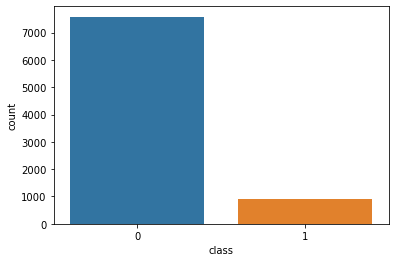

In [291]:
# Assuming you have a DataFrame called 'data' and the target variable is called 'target'
class_counts = df['good_product'].value_counts()

# Convert the counts to a DataFrame for easier plotting
class_counts_df = pd.DataFrame({'class': class_counts.index, 'count': class_counts.values})

# Create a bar plot using seaborn
sns.barplot(x='class', y='count', data=class_counts_df)

## Exploratory Data Analysis

Show the ingredient that appear most in the dataset

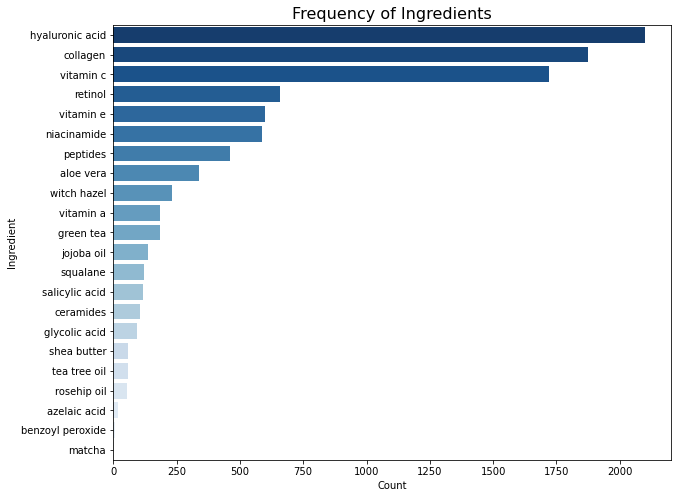

In [292]:
# Get the total count of each ingredient across all columns
ingredient_counts = df[ingredients].sum().reset_index()
ingredient_counts.columns = ['Ingredient', 'Count']

# Sort the ingredients by count in descending order
ingredient_counts = ingredient_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Ingredient', data=ingredient_counts, palette = 'Blues_r')
plt.title('Frequency of Ingredients', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()

determine the outlier 

<AxesSubplot:xlabel='price'>

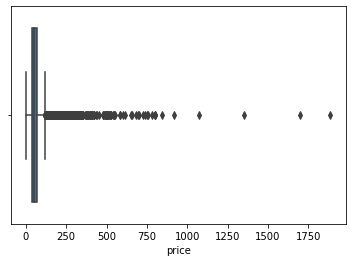

In [293]:
sns.boxplot(x = 'price', data = df)

<AxesSubplot:xlabel='rating'>

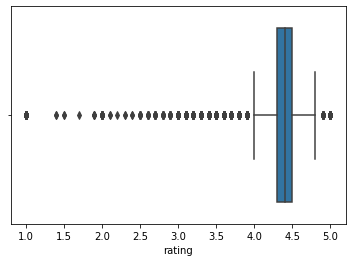

In [294]:
sns.boxplot(x = 'rating', data = df)

<AxesSubplot:xlabel='review'>

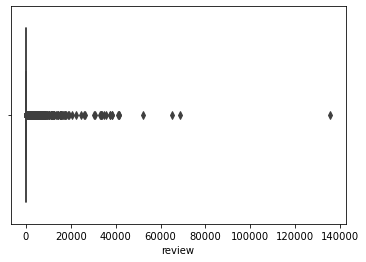

In [295]:
sns.boxplot(x = 'review', data = df)

Replace the price with mean since it is right-skewed in order to avoid the extreme cases

In [296]:
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/3531788644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'].fillna(median_price, inplace=True)


In [297]:
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/2566686856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].fillna(median_rating, inplace=True)


In [298]:
median_review = df['review'].median()
df['review'].fillna(median_review, inplace=True)

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/113449366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'].fillna(median_review, inplace=True)


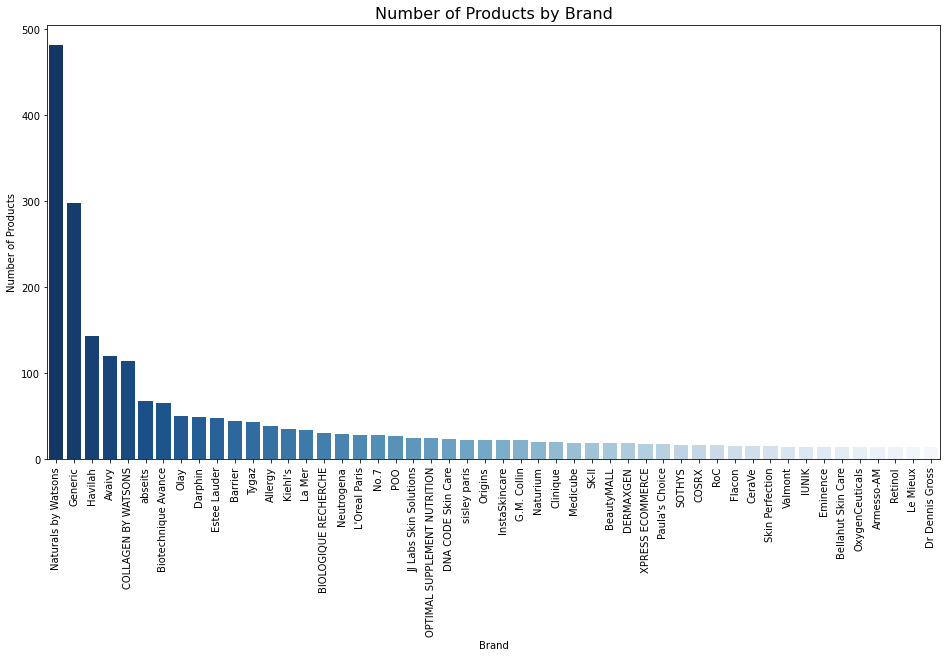

In [214]:
# Count the number of occurrences of each brand
brand_counts = df['brand'].value_counts().head(50)

# Create a bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='Blues_r')
plt.xticks(rotation=90)
plt.title('Number of Products by Brand', fontsize=16)
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

## Competitor Analysis

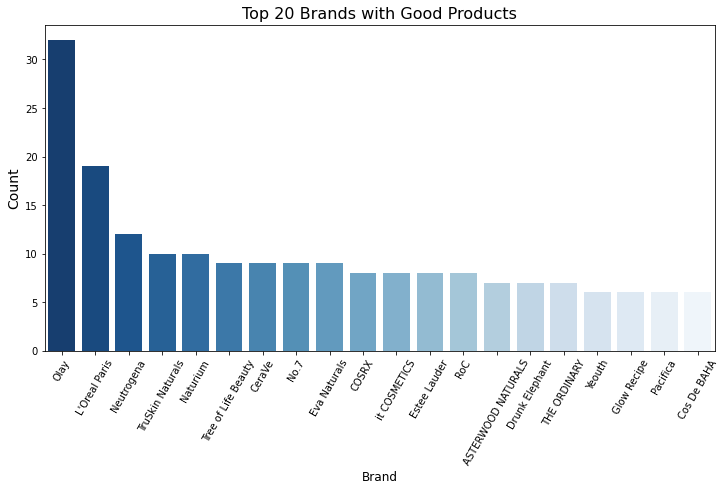

In [215]:
good_brand = df[df['good_product']==1]['brand'].value_counts().reset_index(name = 'count').rename(columns = {'index':'brand'}).sort_values(by = 'count', ascending = False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='count', data=good_brand, palette = 'Blues_r')
plt.title('Top 20 Brands with Good Products', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=60)
plt.show()

## Review Prediction

Perform target encoding for categorical variable

In [299]:
# Define the categorical features to be encoded
cat_features = ["brand", "seller"]

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=cat_features)

# Fit the target encoder on the dataset
target_encoder.fit(df[cat_features], df["review"])

# Transform the categorical features using the target encoder and replace in the original DataFrame
df[cat_features] = target_encoder.transform(df[cat_features])

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_74179/839353430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_features] = target_encoder.transform(df[cat_features])


In [300]:
df

,title,brand,review,rating,price,category,description,seller,hyaluronic acid,retinol,...,squalane,witch hazel,azelaic acid,vitamin e,vitamin a,benzoyl peroxide,collagen,shea butter,matcha,good_product
0,"Tree of Life Vitamin C Serum, Retinol Serum an...",2317.749268,65249.0,4.4,23.95,Face,nan,2274.105397,1,1,...,0,0,0,0,0,0,0,0,0,1
1,OZNATURALS Hyaluronic Acid Serum for Face - Pl...,612.514413,2437.0,4.4,18.00,Face,nan,612.514413,1,0,...,0,0,0,0,0,0,0,0,0,1
2,AZURE Hyaluronic Acid & Retinol Anti Aging Fac...,384.894449,592.0,4.4,7.69,Face,nan,384.894449,1,1,...,0,0,0,0,0,0,0,0,0,1
3,Eva Naturals Vitamin C Serum for Face Plus Hya...,2732.234577,52231.0,4.3,14.99,Face,nan,2732.234577,1,1,...,0,0,0,0,0,0,0,0,0,1
4,Wishful Hydrate & Glow Trio Gift Set:: Yo Glow...,250.623239,36.0,4.2,32.06,Face,WISHFULHydrate and Glow TrioA must-have set of...,273.321007,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,Anti Wrinkle Collagen Restoring Serum by Mojo ...,290.132027,35.0,4.2,49.99,Face,nan,284.735797,1,0,...,0,0,0,0,0,0,1,0,0,0
9978,Deve Herbes Plant Based Vitamin C Face Serum w...,25.000000,25.0,4.4,19.99,Face,Deve Herbes Plant Based Vitamin C Face Serum w...,25.000000,1,0,...,0,0,0,1,1,0,0,0,0,0
9979,"Hhkuize Biolap Aloe Vera Acne Serum Gel, 100% ...",13.826004,1.0,1.0,49.99,Face,nan,15.235812,0,0,...,0,0,0,0,0,0,0,0,0,0
9980,Tygaz Biovana Skin Serum Anti-Aging Formula - ...,50.244635,4.0,4.3,39.95,Face,Biovana Skin Serum Anti-Aging Formula - 3 Pack,37.530548,0,0,...,0,0,0,0,0,0,0,0,0,0


## Perform the Decision Tree Regression

In [301]:
X = df[df.columns.difference(['review','rating','description','title','category','glycolic acid','good_product'])]
y = df.good_product


#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify=y)

In [302]:
from sklearn import tree

#define classification algorithm
clf_tree = tree.DecisionTreeClassifier(max_depth = 3, criterion='entropy')
clf_tree = clf_tree.fit(X_train, y_train)

y_pred_tree = clf_tree.predict(X_test)

[[2402  100]
 [  76  221]]


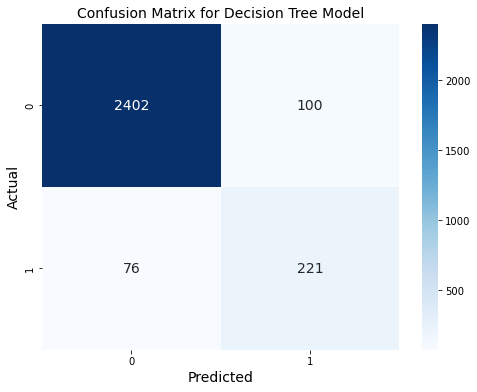

In [303]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred_tree)
print(confusion_mat)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree Model', fontsize = 14)

# Show the plot
plt.show()

In [304]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2502
           1       0.69      0.74      0.72       297

    accuracy                           0.94      2799
   macro avg       0.83      0.85      0.84      2799
weighted avg       0.94      0.94      0.94      2799



## ROC-AUC curve

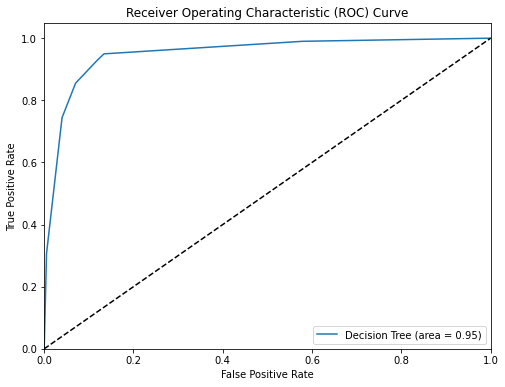

AUC score:  0.951249101728718


In [305]:
# Predict probabilities for X_test
y_pred_prob_tree = clf_tree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC score: ", roc_auc_score(y_test, y_pred_prob_tree))

### Feature Importance

In [306]:
# The columns used for fitting the model
feature_columns = X_train.columns

In [307]:
feature_imp_tree = pd.Series(clf_tree.feature_importances_, index = feature_columns.to_list()).sort_values(ascending=False)[:10]
feature_imp_tree

seller          0.847063
brand           0.131528
price           0.021409
retinol         0.000000
vitamin e       0.000000
vitamin c       0.000000
vitamin a       0.000000
tea tree oil    0.000000
squalane        0.000000
shea butter     0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


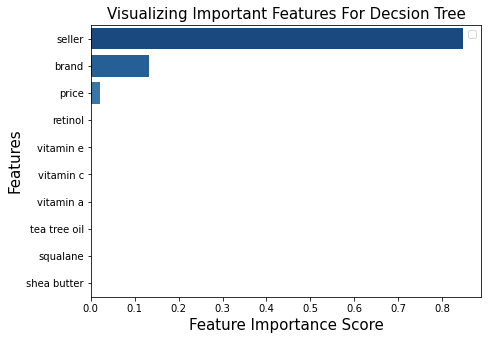

In [324]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_tree, y=feature_imp_tree.index, palette = 'Blues_r')
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For Decsion Tree", fontsize = 15)
plt.legend()
plt.show()

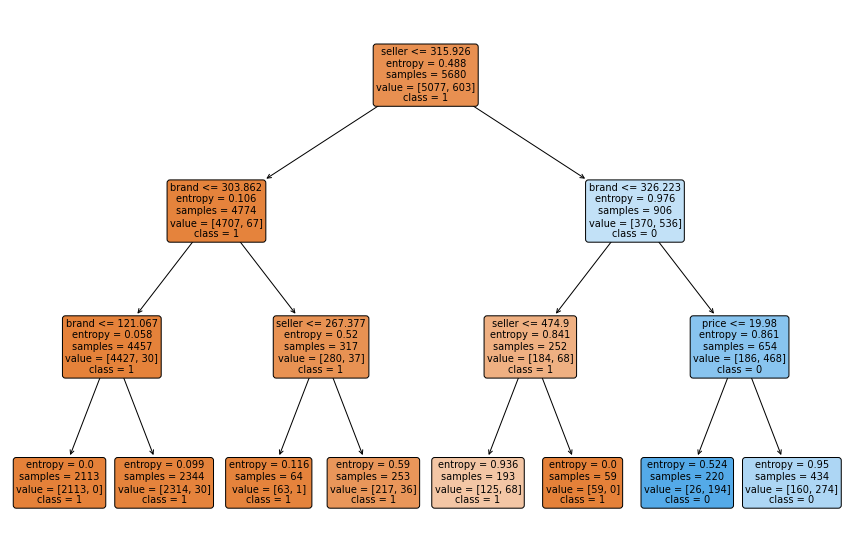

In [309]:
#plotting the decision tree
# Create a heatmap
plt.figure(figsize=(15, 10))
feature_columns = X_train.columns
feature_names = feature_columns.to_list()
class_names = ['1','0']
tree.plot_tree(clf_tree, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

## Perform the XGBoost Regression

In [310]:
clf_xgb = XGBClassifier(objective = 'binary:logistic', 
                        eval_metric = 'logloss',
                        learning_rate = 0.1, 
                        max_depth = 5, 
                        n_estimators = 5000, 
                        verbosity = 1,
                        seed = 42)

clf_xgb.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.61461
[1]	validation_0-logloss:0.55016
[2]	validation_0-logloss:0.49658
[3]	validation_0-logloss:0.45113
[4]	validation_0-logloss:0.41259
[5]	validation_0-logloss:0.37944
[6]	validation_0-logloss:0.35083
[7]	validation_0-logloss:0.32594
[8]	validation_0-logloss:0.30419
[9]	validation_0-logloss:0.28518
[10]	validation_0-logloss:0.26862
[11]	validation_0-logloss:0.25399
[12]	validation_0-logloss:0.24124
[13]	validation_0-logloss:0.22990
[14]	validation_0-logloss:0.21977
[15]	validation_0-logloss:0.21077
[16]	validation_0-logloss:0.20290
[17]	validation_0-logloss:0.19602
[18]	validation_0-logloss:0.18982
[19]	validation_0-logloss:0.18437
[20]	validation_0-logloss:0.18005


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-logloss:0.17580
[22]	validation_0-logloss:0.17206
[23]	validation_0-logloss:0.16893
[24]	validation_0-logloss:0.16582
[25]	validation_0-logloss:0.16328
[26]	validation_0-logloss:0.16101
[27]	validation_0-logloss:0.15888
[28]	validation_0-logloss:0.15732
[29]	validation_0-logloss:0.15565
[30]	validation_0-logloss:0.15399
[31]	validation_0-logloss:0.15262
[32]	validation_0-logloss:0.15145
[33]	validation_0-logloss:0.15033
[34]	validation_0-logloss:0.14938
[35]	validation_0-logloss:0.14868
[36]	validation_0-logloss:0.14786
[37]	validation_0-logloss:0.14722
[38]	validation_0-logloss:0.14661
[39]	validation_0-logloss:0.14610
[40]	validation_0-logloss:0.14566
[41]	validation_0-logloss:0.14525
[42]	validation_0-logloss:0.14500
[43]	validation_0-logloss:0.14455
[44]	validation_0-logloss:0.14420
[45]	validation_0-logloss:0.14394
[46]	validation_0-logloss:0.14390
[47]	validation_0-logloss:0.14359
[48]	validation_0-logloss:0.14345
[49]	validation_0-logloss:0.14350
[50]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

[[2414   88]
 [  71  226]]


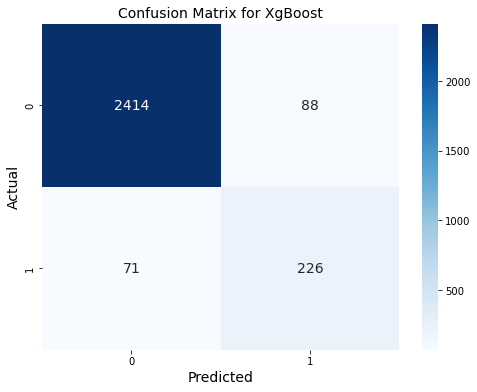

In [311]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_xgb = clf_xgb.predict(X_test)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print(conf_matrix_xgb)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual' , fontsize = 14)
plt.title('Confusion Matrix for XgBoost' , fontsize = 14)

# Show the plot
plt.show()

In [312]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2502
           1       0.72      0.76      0.74       297

    accuracy                           0.94      2799
   macro avg       0.85      0.86      0.85      2799
weighted avg       0.94      0.94      0.94      2799



## ROC-AUC Curve

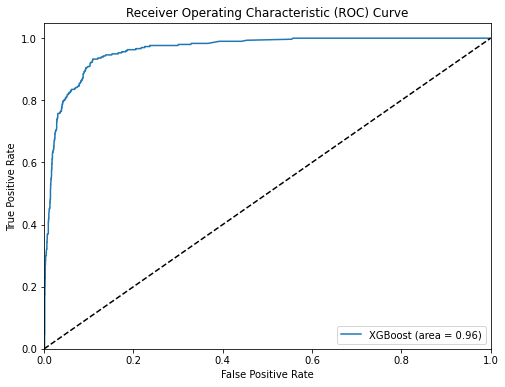

AUC score:  0.9626917994224149


In [313]:
# Predict probabilities for X_test
y_pred_prob_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC score: ", roc_auc_score(y_test, y_pred_prob_xgb))

## Feature Importance

In [314]:
feature_imp_xgb = pd.Series(clf_xgb.feature_importances_, index = feature_columns.to_list()).sort_values(ascending=False)[:10]
feature_imp_xgb

seller             0.470496
brand              0.102624
price              0.062373
vitamin c          0.056945
salicylic acid     0.049011
niacinamide        0.039940
hyaluronic acid    0.039232
aloe vera          0.036367
vitamin e          0.035778
collagen           0.032008
dtype: float32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


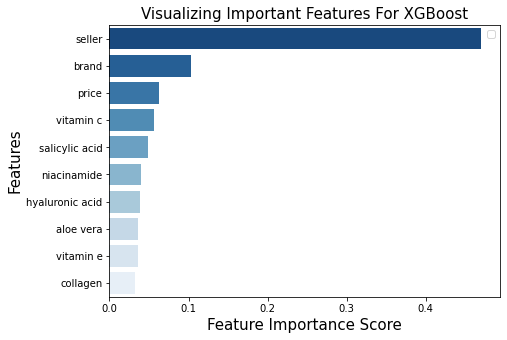

In [323]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_xgb, y=feature_imp_xgb.index, palette = 'Blues_r')
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For XGBoost", fontsize = 15)
plt.legend()
plt.show()

In [316]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
clf_rdm = RandomForestClassifier(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
clf_rdm = clf_rdm.fit(X_train, y_train)  

y_pred_rdm = clf_rdm.predict(X_test)

[[2425   77]
 [  90  207]]


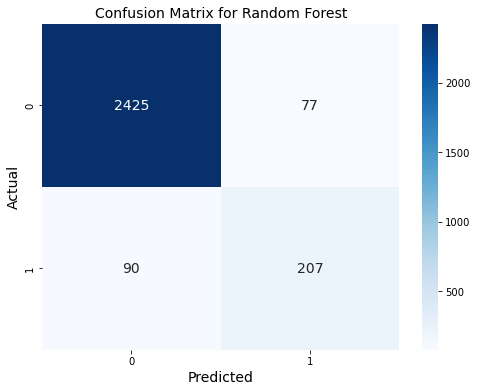

In [317]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rdm = confusion_matrix(y_test, y_pred_rdm)
print(confusion_matrix_rdm)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rdm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Random Forest', fontsize = 14)

# Show the plot
plt.show()

In [318]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rdm))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2502
           1       0.73      0.70      0.71       297

    accuracy                           0.94      2799
   macro avg       0.85      0.83      0.84      2799
weighted avg       0.94      0.94      0.94      2799



## ROC-AUC Curve

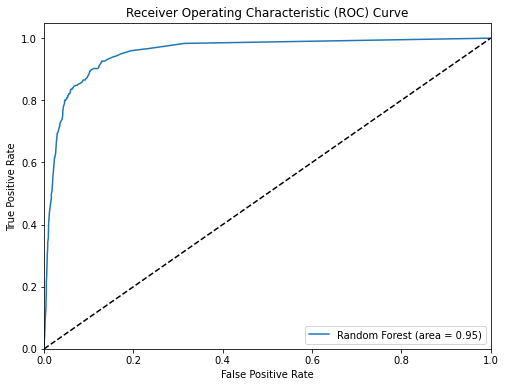

AUC score:  0.9548677556271481


In [319]:
# Predict probabilities for X_test
y_pred_prob_rdm = clf_rdm.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rdm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC score: ", roc_auc_score(y_test, y_pred_prob_rdm))

In [320]:
feature_imp_rdm = pd.Series(clf_rdm.feature_importances_,index=cols[~cols.isin(['review','rating','description','title','category','good_product','glycolic acid'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_rdm

seller             0.366596
brand              0.354242
price              0.180081
hyaluronic acid    0.013451
vitamin c          0.012638
retinol            0.010683
collagen           0.010045
niacinamide        0.008533
vitamin e          0.007505
peptides           0.005390
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


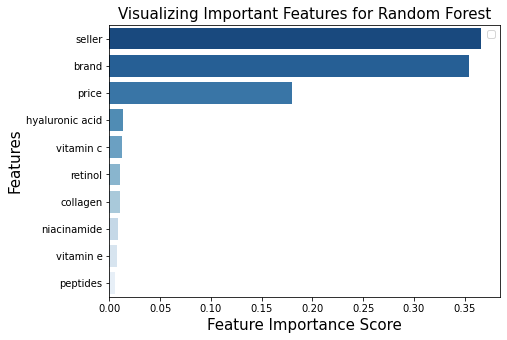

In [322]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_rdm, y=feature_imp_rdm.index, palette = 'Blues_r')
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features for Random Forest", fontsize = 15)
plt.legend()
plt.show()